In [266]:
from urllib import request
from bs4 import BeautifulSoup

page = request.urlopen().read()
soup = BeautifulSoup(page)


c:\anaconda2\envs\py36\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\anaconda2\envs\py36\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [ ]:
for year in 

In [368]:
#a= soup.find(id='Collegiate_Baseball')
#


df_baseball = pd.DataFrame()

for year in range(2002,2017+1):
    print(year)
    link = 'https://en.wikipedia.org/wiki/%s_NCAA_Division_I_baseball_rankings'%(year)
    soup = BeautifulSoup(request.urlopen(link).read())
 
    df = pd.read_html(str(soup.find(id=['Collegiate_Baseball','Collegiate_Baseball_Poll']).find_next('table')))[0]
    
    columns = ['RK']
    columns.extend(df.loc[0][1:])
    df.columns = columns
    df['SEASON'] = year

    df_baseball = df_baseball.append(pd.melt(df[df.RK.notnull()],id_vars=['RK','SEASON'], 
                                   value_vars = [row for row in df.columns if str(row) not in ('SEASON','nan','RK')], 
                                   var_name = 'WEEK', value_name = 'TEAM')).dropna()

2002


c:\anaconda2\envs\py36\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\anaconda2\envs\py36\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [384]:
df_football['TEAM_PARSED'] = df_football.TEAM.map(lambda x: x.split('(')[0].strip())
df_baseball['TEAM_PARSED'] = df_baseball.TEAM.map(lambda x: x.split('(')[0].strip())

df_basketball.SEASON = df_basketball.SEASON.map(lambda x:x.split('-')[0])

In [459]:
teams = []

rankings = pd.DataFrame(columns=('SEASON', 'TEAM', 'BASKETBALL','FOOTBALL','BASEBALL'))
for year in range(2006,2017):
    
    teams = df_baseball[(df_baseball.SEASON == year) & \
                  df_baseball.TEAM_PARSED.isin(df_basketball[(df_basketball.SEASON == year) & \
                  df_basketball.TEAM_PARSED.isin(df_football[df_football.SEASON==year].TEAM_PARSED)].TEAM_PARSED)] \
        .TEAM_PARSED.unique()
        
    for team in teams:
        rankings = rankings.append([{'SEASON':year,'TEAM':team, 
                          'BASKETBALL':df_basketball[(df_basketball.SEASON == year) &\
                                                     (df_basketball.TEAM_PARSED == team)].RK.mean(),
                          'FOOTBALL':df_football[(df_football.SEASON == year) & (df_football.TEAM_PARSED == team)].RK.mean(),
                          'BASEBALL': df_baseball[(df_baseball.SEASON == year) & (df_baseball.TEAM_PARSED == team)].RK.mean()
                         
                         }])
       
        
        
        
        
 {‘split’,’records’,’index’,’columns’,’values’}

In [519]:
for team in rankings.TEAM.unique():
    print(team)

Texas
Florida
Clemson
Georgia Tech
LSU
Tennessee
Notre Dame
Texas A&M
Washington State
Ohio State
Arkansas
Virginia
Arizona State
UCLA
Kentucky
Louisville
North Carolina
Florida State
Miami
Missouri
California
Oklahoma
Michigan
West Virginia
Kansas
Arizona
Pittsburgh
Virginia Tech
Connecticut
Baylor
Alabama
Mississippi State
Oregon
Oklahoma State
TCU
Washington
Duke
Nebraska
USC
Iowa


In [ ]:
http://www.ncaa.com/schools/alabama

In [517]:
#soup = BeautifulSoup(request.urlopen('http://www.ncaa.com/schools/tcu').read())

soup.find(id='block-system-main')

<div class="block block-system" id="block-system-main">
<div class="content">
<p>We apologize for the inconvenience, but the page you are looking for might have been removed, had its name changed, or is temporarily unavailable.</p>
<p><strong>If you feel you reached this page in error, please try the following: </strong></p>
<p></p>
<ul>
<li>If you typed the URL yourself, please make sure that the spelling is correct.</li>
<li>If you clicked on a link to get here, there may be a problem with the link.</li>
</ul>
<p>Try using your browser’s “Back” button to return to the previous page to choose a different link on that page.</p>
</div>
</div>

In [ ]:
import requests
from io import BytesIO
from IPython.display import Image, display

logos = {}
schools = list(set(rankings.TEAM.unique()))

for school in schools:
    print(school)
    
    school = school.lower().replace(' ','-').replace('state','st')
    
    img = 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/%s/%s.40.png'%(school[0],school)
    display(Image(url= img))
    ip = input('Keep?')
    if ip == 'y':
        logos[school] = img
    else:
        logos[school] = ip

 

Michigan


Keep?y
Florida State


Keep?y
Alabama


Keep?y
Arizona State


Keep?y
UCLA


Keep?y
West Virginia


Keep?y
Oklahoma


Keep?y
Mississippi State


Keep?y
Clemson


Keep?y
Missouri


Keep?y
Florida


Keep?y
California


Keep?y
Miami


Keep?http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/m/miami-fl.40.png
Texas A&M


Keep?http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/t/.40.png
Ohio State


Keep?y
Texas


Keep?y
Louisville


Keep?y
LSU


Keep?y
USC


Keep?http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/s/southern-california.40.png
Virginia Tech


Keep?y
Duke


Keep?y
Oklahoma State


Keep?y
TCU


Keep?y
Pittsburgh


Keep?y
Tennessee


Keep?y
Washington


Keep?y
Kansas


Keep?y
Arizona


Keep?y
Oregon


Keep?y
Arkansas


Keep?y
Baylor


Keep?y
Nebraska


Keep?y
Iowa


Keep?y
Georgia Tech


Keep?y
Notre Dame


Keep?y
North Carolina


Keep?y
Kentucky


Keep?y
Washington State


Keep?y
Virginia


In [545]:
img = 'http://i.turner.ncaa.com/dr/ncaa/ncaa7/release/sites/default/files/images/logos/schools/f/florida-st.40.png'

In [549]:

b = Image(url=img)
b.data

In [534]:
set(rankings.TEAM.unique())

['Michigan',
 'Florida State',
 'Alabama',
 'Arizona State',
 'UCLA',
 'West Virginia',
 'Oklahoma',
 'Mississippi State',
 'Clemson',
 'Missouri',
 'Florida',
 'California',
 'Miami',
 'Texas A&M',
 'Ohio State',
 'Texas',
 'Louisville',
 'LSU',
 'USC',
 'Virginia Tech',
 'Duke',
 'Oklahoma State',
 'TCU',
 'Pittsburgh',
 'Tennessee',
 'Washington',
 'Kansas',
 'Arizona',
 'Oregon',
 'Arkansas',
 'Baylor',
 'Nebraska',
 'Iowa',
 'Georgia Tech',
 'Notre Dame',
 'North Carolina',
 'Kentucky',
 'Washington State',
 'Virginia',
 'Connecticut']

In [454]:
df_baseball[(df_baseball.SEASON == year) & (df_baseball.TEAM_PARSED == teams[1])].RK.mean()
df_football[(df_football.SEASON == year) & (df_football.TEAM_PARSED == teams[1])].RK.mean()
df_basketball[(df_basketball.SEASON == year) & (df_basketball.TEAM_PARSED == teams[1])].RK.mean()

19.923076923076923

In [452]:
df_baseball[(df_baseball.SEASON == year)& (df_baseball.TEAM.str.startswith('Flor'))]

,RK,SEASON,WEEK,TEAM,TEAM_PARSED
0,1.0,2016,Preseason Dec 21[33],Florida,Florida
15,16.0,2016,Preseason Dec 21[33],Florida State,Florida State
30,1.0,2016,Week 1 Feb 22[34],Florida (3–0),Florida
40,11.0,2016,Week 1 Feb 22[34],Florida State (3–0),Florida State
47,18.0,2016,Week 1 Feb 22[34],Florida Atlantic (4–0),Florida Atlantic
60,1.0,2016,Week 2 Feb 29[35],Florida (7–1),Florida
70,11.0,2016,Week 2 Feb 29[35],Florida State (5–1),Florida State
74,15.0,2016,Week 2 Feb 29[35],Florida Atlantic (7–0),Florida Atlantic
90,1.0,2016,Week 3 Mar 7[36],Florida (12–1),Florida
103,14.0,2016,Week 3 Mar 7[36],Florida State (8–3),Florida State


In [412]:
df_basketball[      df_basketball.TEAM in (df_football[df_football.SEASON==2006].TEAM_PARSED.unique()]

SyntaxError: invalid syntax (<ipython-input-412-e2af486eeba6>, line 1)

In [356]:
df_football = pd.DataFrame()

for year in range(2002,2017+1):
    print(year)
    link = 'https://en.wikipedia.org/wiki/%s_NCAA_Division_I_FBS_football_rankings'%(year)
    soup = BeautifulSoup(request.urlopen(link).read())
 
    df = pd.read_html(str(soup.find(id=['AP_Poll','AP_poll']).find_next('table')))[0]
    
    columns = ['RK']
    columns.extend(df.loc[0][1:])
    df.columns = columns
    df['SEASON'] = year

    df_football = df_football.append(pd.melt(df[df.RK.notnull()],id_vars=['RK','SEASON'], 
                                   value_vars = [row for row in df.columns if str(row) not in ('nan','RK','SEASON')], 
                                   var_name = 'WEEK', value_name = 'TEAM')).dropna()

2002


c:\anaconda2\envs\py36\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\anaconda2\envs\py36\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [366]:
df_football

,RK,SEASON,WEEK,TEAM
0,1.0,2002,Preseason Preseason[1],Miami (FL) (27)
1,2.0,2002,Preseason Preseason[1],Oklahoma (21)
2,3.0,2002,Preseason Preseason[1],Florida State (10)
3,4.0,2002,Preseason Preseason[1],Texas (13)
4,5.0,2002,Preseason Preseason[1],Tennessee (3)
5,6.0,2002,Preseason Preseason[1],Florida
6,7.0,2002,Preseason Preseason[1],Colorado
7,8.0,2002,Preseason Preseason[1],Georgia
8,9.0,2002,Preseason Preseason[1],Washington
9,10.0,2002,Preseason Preseason[1],Nebraska


In [347]:
df_baseball.dropna()

,RK,WEEK,TEAM
0,1.0,Preseason Dec 20[3],Stanford
1,2.0,Preseason Dec 20[3],Florida State
2,3.0,Preseason Dec 20[3],Tulane
3,4.0,Preseason Dec 20[3],Southern California
4,5.0,Preseason Dec 20[3],LSU
5,6.0,Preseason Dec 20[3],Clemson
6,7.0,Preseason Dec 20[3],Miami (FL)
7,8.0,Preseason Dec 20[3],South Carolina
8,9.0,Preseason Dec 20[3],Wichita State
9,10.0,Preseason Dec 20[3],Oklahoma State


In [326]:
import numpy as np
[(type(row),str(row)) for row in df.columns]

[(str, 'RK'),
 (str, 'Preseason Dec 23[3]'),
 (str, 'Week 1 Feb 3[4]'),
 (str, 'Week 2 Feb 10[5]'),
 (str, 'Week 3 Feb 17[6]'),
 (str, 'Week 4 Feb 24[7]'),
 (str, 'Week 5 Mar 3[8]'),
 (str, 'Week 6 Mar 10[9]'),
 (str, 'Week 7 Mar 17[10]'),
 (str, 'Week 8 Mar 24[11]'),
 (str, 'Week 9 Mar 31[12]'),
 (str, 'Week 10 Apr 7[13]'),
 (str, 'Week 11 Apr 14[14]'),
 (str, 'Week 12 Apr 21[15]'),
 (str, 'Week 13 Apr 28[16]'),
 (str, 'Week 14 May 5[17]'),
 (str, 'Week 15 May 12[18]'),
 (str, 'Week 16 May 19[19]'),
 (str, 'Week 17 May 26[20]'),
 (str, 'Week 18 June 2[21]'),
 (str, 'Week 19 June 9[22]'),
 (str, 'Week 20 June 24[23]'),
 (numpy.float64, 'nan')]

In [307]:
nan

NameError: name 'nan' is not defined

In [146]:
#Basketball Rankings
from time import sleep

df_all = pd.DataFrame()


for year in range(2003,2017+1):
    
    for week in range(1,18+1):
        
        link = 'http://www.espn.com/mens-college-basketball/rankings/_/year/%s/week/%s/seasontype/2'%(year,week)
        soup = BeautifulSoup(request.urlopen(link).read())
 
        sleep(.2)
        try:
            print(year,week)
            for table in soup.findAll('table'):
                df = pd.read_html(str(table))[0]

                df.columns = df.iloc[1]
                df['POLL'] = df.iloc[0][0]
                df = df[2:]
                #Season
                df['SEASON'] = soup.find(id='dropdowns').findAll('option',selected=True)[0].text

                #Week
                df['WEEK'] = soup.find(id='dropdowns').findAll('option',selected=True)[1].text

                #title
                df['TITLE'] = soup.findAll('h1')[0].text
                if len(df) > 5:
                    df_all = df_all.append(df)
        except: 
            print(year,week,'EXCEPTION')
            next


c:\anaconda2\envs\py36\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\anaconda2\envs\py36\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


2003 1
2003 2
2003 3
2003 4
2003 5
2003 6
2003 7
2003 8
2003 9
2003 10
2003 11
2003 12
2003 13
2003 14
2003 15
2003 16
2003 17
2003 18
2004 1
2004 2
2004 3
2004 4
2004 5
2004 6
2004 7
2004 8
2004 9
2004 10
2004 11
2004 12
2004 13
2004 14
2004 15
2004 16
2004 17
2004 18
2004 18 EXCEPTION
2005 1
2005 2
2005 3
2005 4
2005 5
2005 6
2005 7
2005 8
2005 9
2005 10
2005 11
2005 12
2005 13
2005 14
2005 15
2005 16
2005 17
2005 18
2005 18 EXCEPTION
2006 1
2006 2
2006 2 EXCEPTION
2006 3
2006 4
2006 5
2006 6
2006 7
2006 8
2006 9
2006 10
2006 11
2006 12
2006 13
2006 14
2006 15
2006 16
2006 17
2006 18
2007 1
2007 2
2007 3
2007 4
2007 5
2007 6
2007 7
2007 8
2007 9
2007 10
2007 11
2007 12
2007 13
2007 14
2007 15
2007 16
2007 17
2007 18
2008 1
2008 2
2008 3
2008 4
2008 5
2008 6
2008 7
2008 8
2008 9
2008 10
2008 11
2008 12
2008 13
2008 14
2008 15
2008 16
2008 17
2008 18
2009 1
2009 2
2009 3
2009 4
2009 5
2009 6
2009 7
2009 8
2009 9
2009 10
2009 11
2009 12
2009 13
2009 14
2009 15
2009 16
2009 17
2009 18
20

In [265]:
df_all.to_csv('NCAABrankings.csv')

In [260]:
df_all[df_all.TEAM_PARSED.str.startswith('Alaba')].TEAM_PARSED.unique()

array(['Alabama'], dtype=object)

In [230]:
df_all[(df_all.POLL == 'AP Top 25') & (df_all.TEAM_PARSED == 'Alabama')].RK.mean()

14.444444444444445

In [259]:
df_all.TEAM_PARSED = df_all.TEAM_PARSED.str.strip()

In [213]:
df_all.dtypes

1
RK              int64
TEAM           object
RECORD         object
PTS             int64
POLL           object
SEASON         object
WEEK           object
TITLE          object
TEAM_PARSED    object
dtype: object

In [119]:
for year in dfDict:
    print(year,len(dfDict[year][0]))

2003 25
2004 25
2005 25
2006 25
2007 25
2008 25
2009 25
2010 25
2011 25
2012 25
2013 26
2014 25
2015 26
2016 25
2017 25


In [123]:
df_all = pd.DataFrame()

In [125]:
df_all = df_all.append(dfDict[2011][0])

In [126]:
df_all = df_all.append(dfDict[2012][0])

In [129]:
df_all

1,RK,TEAM,RECORD,PTS,POLL,SEASON,WEEK,TITLE
2,1,Duke (29),0-0,772,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
3,2,Michigan State (2),0-0,737,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
4,3,Kansas State,0-0,656,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
5,4,Pittsburgh,0-0,621,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
6,5,Ohio State,0-0,615,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
7,6,Villanova,0-0,552,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
8,7,Kansas,0-0,538,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
9,8,Purdue,0-0,521,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
10,9,North Carolina,0-0,467,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...
11,10,Kentucky,0-0,449,USA Today Coaches Poll,2010-11,Preseason,2011 NCAA Men's Basketball Rankings - Preseas...


In [29]:
list(range(2003,2017+1))
list(range(1,19+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [30]:
import pandas as pd

'http://www.espn.com/mens-college-basketball/rankings/_/year/2018/week/1/seasontype/2'

In [ ]:
import urllib2
from bs4 import BeautifulSoup

page = urllib2.urlopen('http://68.71.212.186/mens-college-basketball/team/roster/_/id/2751').read()
soup = BeautifulSoup(page)
soup.prettify()

In [41]:
import pandas as pd
#df = pd.read_csv('https://query.data.world/s/27q9lb4mw9d5ck96lhix48tj8')
kag = pd.read_csv('RegularSeasonDetailedResults.csv')
teams = pd.read_csv('Teams.csv')


In [5]:
for letter in 'fang':
    print letter

f
a
n
g


In [57]:
kag[(kag.Season == 2016)&(kag.Wteam == 1330)].Wfga3

65942    12
66091    14
66172    22
66952    23
67434    10
67666     6
67815    15
68003     8
68223     8
68880    11
69197     6
69322    18
69663    10
69867    13
70208     8
70530    10
70656    11
70858    19
70971    25
71092     2
71143    19
71191    10
Name: Wfga3, dtype: int64

In [68]:
list(kag)

['Season',
 'Daynum',
 'Wteam',
 'Wscore',
 'Lteam',
 'Lscore',
 'Wloc',
 'Numot',
 'Wfgm',
 'Wfga',
 'Wfgm3',
 'Wfga3',
 'Wftm',
 'Wfta',
 'Wor',
 'Wdr',
 'Wast',
 'Wto',
 'Wstl',
 'Wblk',
 'Wpf',
 'Lfgm',
 'Lfga',
 'Lfgm3',
 'Lfga3',
 'Lftm',
 'Lfta',
 'Lor',
 'Ldr',
 'Last',
 'Lto',
 'Lstl',
 'Lblk',
 'Lpf']

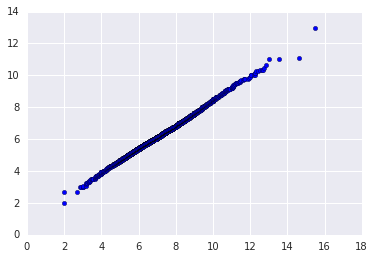

In [93]:
x= kag.groupby(['Season','Wteam']).Wstl.mean().sort_values()
y = kag.groupby(['Season','Wteam']).Lstl.mean().sort_values()
#y = kag.groupby(['Season','Wteam']).size()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x,y)


In [56]:
kag[kag.Season == 2016][['Wfga3','Wfgm3']].sort_values('Wfga3').head()
kag.iloc[71092,:]

kag.groupby(['Season','Wteam']).Wfga3.mean().sort_values()




Season  Wteam
2014    1381      4.000000
2012    1381      6.666667
2011    1381      7.100000
2013    1249      7.666667
2003    1426      7.857143
2012    1406      8.000000
2009    1369      8.500000
2003    1464      9.000000
2007    1411      9.181818
        1339      9.250000
2013    1374      9.285714
2003    1366      9.333333
2009    1191      9.437500
2005    1305      9.478261
2011    1360      9.500000
2013    1144      9.545455
2015    1169      9.571429
2006    1379      9.857143
2014    1249     10.000000
2008    1223     10.000000
2010    1191     10.000000
2015    1398     10.000000
        1237     10.100000
2013    1395     10.100000
2012    1372     10.125000
2014    1191     10.166667
2005    1390     10.166667
2014    1394     10.187500
2010    1171     10.250000
2004    1149     10.250000
                   ...    
2015    1141     27.400000
2006    1144     27.500000
2003    1282     27.555556
2009    1125     27.684211
2016    1125     27.894737
2003    1407  

In [58]:
teams[(teams.Team_Id == 1330) | (teams.Team_Id == 1381)]

,Team_Id,Team_Name
229,1330,Old Dominion
280,1381,Southern Utah


In [ ]:
kag[kag.Season == 2016][['Wfga3','Wfgm3']].sort_values

In [12]:
df[['Winning Seed','Losing Seed','Winning Score','Losing Score']]

,Winning Seed,Losing Seed,Winning Score,Losing Score
0,1,16,68,43
1,4,13,59,58
2,5,12,85,68
3,8,9,60,57
4,1,16,96,83
5,4,13,75,64
6,5,12,78,54
7,9,8,58,55
8,2,15,76,57
9,3,14,49,38


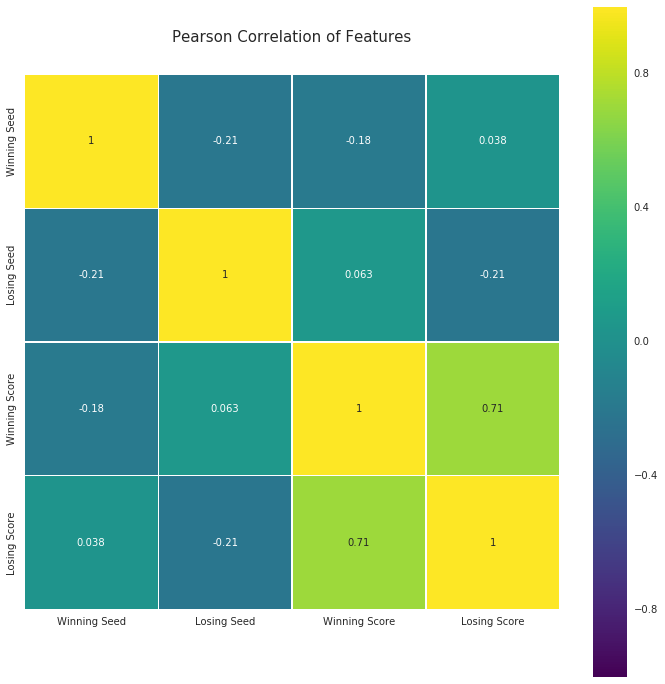

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df[ (df['Winning Seed'] - df['Losing Seed']) == 8]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[['Winning Seed','Losing Seed','Winning Score','Losing Score']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df[ (df['Winning Seed'] - df['Losing Seed']) == 4].groupby(['Winning Seed','Losing Seed']).size

In [16]:

ncaa.sort_values('OPP_SCORE',ascending=False).head(5).to_clipboard()
ncaa.head(5)

,YEAR,REGION,ROUND,BRACKET,TEAM,SCORE,MATCH,SEED,OPP_TEAM,OPP_SEED,OPP_SCORE,ROWN,CAT
0,1985,East,1,1,Georgetown,68,1.0,1,Lehigh,16,43,1,TRAIN
1,1985,East,1,2,Temple,60,2.0,8,Virginia Tech,9,57,3,TRAIN
2,1985,East,1,3,Southern Methodist,85,3.0,5,Old Dominion,12,68,5,TRAIN
3,1985,East,1,4,"Loyola, Illinois",59,4.0,4,Iona,13,58,7,TRAIN
4,1985,East,1,5,Illinois,76,5.0,3,Northeastern,14,57,9,TRAIN


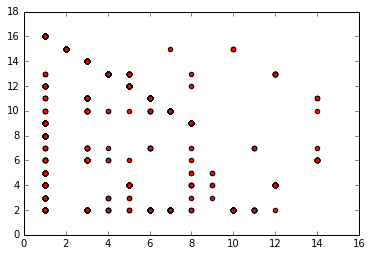

In [21]:
plt.scatter(x=ncaa.SEED,y=ncaa.OPP_SEED, c = 'Red')
#plt.scatter(x=ncaa.SCORE,y=ncaa.OPP_SCORE, c = 'Red')

In [26]:
ncaa[(ncaa.SEED == 1) & (ncaa.OPP_SEED == 13)]

,YEAR,REGION,ROUND,BRACKET,TEAM,SCORE,MATCH,SEED,OPP_TEAM,OPP_SEED,OPP_SCORE,ROWN,CAT
192,1988,East,3,1,Temple,69,1.0,1,Richmond,13,47,385,TRAIN
867,1999,Midwest,3,1,Michigan State,54,1.0,1,Oklahoma,13,46,1735,TRAIN
1317,2006,West,3,1,Memphis,80,1.0,1,Bradley,13,64,2635,TEST


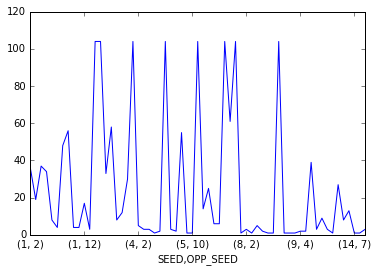

In [32]:
ncaa.groupby(['SEED','OPP_SEED']).order_size().plot()

In [3]:
import pandas as pd
from sqlalchemy import create_engine

alch_CONN_STR = 'SYSTEM:dbpassword@127.0.0.1:1521/XE'

engine = create_engine('oracle+cx_oracle://'+ alch_CONN_STR)

ncaa = pd.read_sql(con=engine, sql = 'SELECT * FROM NCAA_FINAL')
ncaa.columns = [col.strip().upper().replace(' ','_')  for col in ncaa.columns] 

In [69]:
games = ncaa.groupby(['TEAM']).size().add(ncaa.groupby(['OPP_TEAM']).size(),fill_value=0)
wins = ncaa[ncaa.OPP_SCORE<ncaa.SCORE].groupby(['TEAM']).size().add(ncaa[ncaa.OPP_SCORE>ncaa.SCORE].groupby(['OPP_TEAM']).size(),fill_value=0)
(wins/games).sort_values(ascending=False)

ncaa[(ncaa.YEAR == 2013)]

,YEAR,REGION,ROUND,BRACKET,TEAM,SCORE,MATCH,SEED,OPP_TEAM,OPP_SEED,OPP_SCORE,ROWN,CAT
0,1985,East,1,1,Georgetown,68,1.0,1,Lehigh,16,43,1,TRAIN
1,1985,East,1,2,Temple,60,2.0,8,Virginia Tech,9,57,3,TRAIN
2,1985,East,1,3,Southern Methodist,85,3.0,5,Old Dominion,12,68,5,TRAIN
3,1985,East,1,4,"Loyola, Illinois",59,4.0,4,Iona,13,58,7,TRAIN
4,1985,East,1,5,Illinois,76,5.0,3,Northeastern,14,57,9,TRAIN
5,1985,East,1,6,Georgia,67,6.0,6,Wichita State,11,59,11,TRAIN
6,1985,East,1,7,Syracuse,70,7.0,7,DePaul,10,65,13,TRAIN
7,1985,East,1,8,Georgia Tech,65,8.0,2,Mercer,15,58,15,TRAIN
8,1985,East,2,1,Georgetown,63,1.0,1,Temple,8,46,17,TRAIN
9,1985,East,2,3,Southern Methodist,57,2.0,5,"Loyola, Illinois",4,70,19,TRAIN


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
#ncaa.head(5).plot.scatter()

In [929]:
elite_eight = ncaa[ncaa['round'] == 4]
sweet_16 = ncaa[ncaa['round'] == 3]

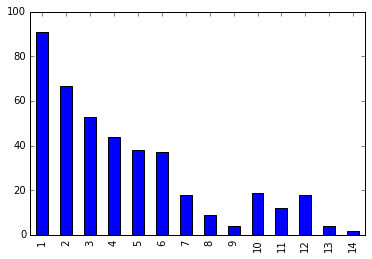

In [931]:
(sweet_16.groupby(ncaa.seed).size().add(sweet_16.groupby(ncaa.opp_seed).size(),fill_value=0)).plot.bar()

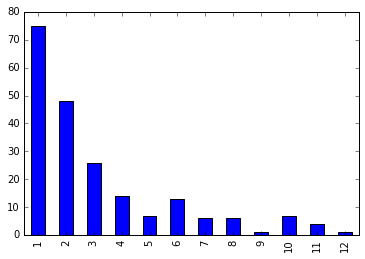

In [928]:
#(ncaa.groupby(ncaa.seed).size().add(ncaa.groupby(ncaa.opp_seed).size(),fill_value=0)).plot.bar()
(elite_eight.groupby(ncaa.seed).size().add(elite_eight.groupby(ncaa.opp_seed).size(),fill_value=0)).plot.bar()

In [ ]:
(ncaa.groupby(ncaa.seed).size().add(ncaa.groupby(ncaa.opp_seed).size(),fill_value=0)).plot

In [894]:
df_final.columns = [col.strip().upper().replace(' ','_')  for col in df_final.columns]  

df_final.to_sql(name='NCAA',con=engine,index_label= 'RECORD_NUM',index=True)

In [48]:
import time

for team in xrange(2750,2770):
    page = urllib2.urlopen('http://68.71.212.186/mens-college-basketball/team/roster/_/id/' + str(team)).read()
    soup = BeautifulSoup(page)
    time.sleep(.1)
    if len(soup.findAll('b')) > 0:
        print soup.findAll('b')[0]
    



<b>Wright State Raiders</b>
<b>Wyoming Cowboys</b>
<b>Xavier Musketeers</b>
<b>Xavier LA Gold Rush</b>
<b>Youngstown State Penguins</b>
<b>Grambling Tigers</b>
<b>Berry Vikings</b>
<b>Howard Payne Yellow Jackets</b>
<b>Dalhousie Tigers</b>
<b>Lethbridge Pronghorns</b>


In [68]:
#year = str(2014)


In [78]:

link = 'http://www.espn.com/mens-college-basketball/statistics/player/_/stat/blocks/sort/blocks/year/'
for year in xrange(2000,2016):
    page = urllib2.urlopen(link + str(year))
    soup = BeautifulSoup(page)
    print year,soup.findAll('td')[25]
    time.sleep(.5)                       
    


2000 <td class="sortcell">78</td>
2001 <td class="sortcell">78</td>
2002 <td class="sortcell">127</td>
2003 <td class="sortcell">116</td>
2004 <td class="sortcell">111</td>
2005 <td class="sortcell">129</td>
2006 <td class="sortcell">163</td>
2007 <td class="sortcell">156</td>
2008 <td class="sortcell">143</td>
2009 <td class="sortcell">142</td>
2010 <td class="sortcell">163</td>
2011 <td class="sortcell">124</td>
2012 <td class="sortcell">126</td>
2013 <td class="sortcell">128</td>
2014 <td class="sortcell">124</td>
2015 <td class="sortcell">107</td>


In [386]:
link = 'http://www.databasesports.com/ncaab/tourney.htm?yr=' + str(year)

page = urllib2.urlopen(link)
soup = BeautifulSoup(page)

In [182]:
import urllib2
from bs4 import BeautifulSoup
dir(soup.findAll('table')[3].findAll('a')[0])
midwest = soup.findAll('table')[3]

#.findAll('a')[0].find_previous_sibling()

In [318]:
type(midwest.findAll("tr", { "class" : "tourney" })[0].findAll('td')[1].contents[1])

IndexError: list index out of range

In [864]:
list()

[1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [882]:


bracket = 6
#year = 2010
df_final = pd.DataFrame()

for year in xrange(1985,2010+1):
    
    team_seed = {}

    data = []
    
    time.sleep(.5)
    link = 'http://www.databasesports.com/ncaab/tourney.htm?yr=' + str(year)

    page = urllib2.urlopen(link)
    soup = BeautifulSoup(page)

    for region_num in xrange(2,6):

        region_name = soup.findAll('table')[region_num].contents[0].contents[0].contents[0]

        region = soup.findAll('table')[region_num]


        for b_num, bracket in enumerate(region.findAll("tr", { "class" : "tourney" })):

            for k,tag in enumerate( bracket.findAll('td')):

        #for k,tag in enumerate(south.findAll("tr", { "class" : "tourney" })[bracket].findAll('td')):
            #print tag.contents

            #print 'tag' + str(k)

                for i,content in enumerate(tag.contents):

                    #print 'content' + str(i)

                    if k == 0:
                        rnd = 1
                        if i in (0,4):
                            seed = content
                        if i in (1,5):
                            team = content.text
                            if team not in team_seed:
                                team_seed[team] = seed
                        if i in (2,6):
                            score = int(content.strip())

                            data.append([year,region_name,rnd,b_num+1,team,score])

                    if k > 0 and k < 8:

                        rnd = k/2.0+1
                        if rnd == int(rnd):

                            if i == 0:
                                team = content.text
                                #print 'round : ' + str(rnd) + ',team: ' + team
                            if i == 1:
                                score = int(content.strip())
                                data.append([year,region_name,int(rnd),b_num+1,team,score])

                    #if  type(content) == type(bs4tag):
                    #    print content.text
                    #else:
                    #    print content
    df = pd.DataFrame(data, columns=['Year','Region','Round','Bracket','Team','Score'])
    df['Match'] = np.ceil(df.Bracket/(2.0**(df.Round-1)))

    for team in team_seed:
        team_seed[team] = int(str(team_seed[team]).strip().replace('(','').replace(')',''))
        df['Seed'] = df['Team'].map(team_seed)

    df_final = df_final.append(df,ignore_index=True)


In [887]:


#alch_CONN_STR = 'SYSTEM:dbpassword@127.0.0.1:1521/XE'

engine = create_engine('oracle+cx_oracle://'+ alch_CONN_STR)
df_final.groupby(['Year','Region','Round','Bracket'])

Year  Region   Round  Bracket
1985  East     1      1          2
                      2          2
                      3          2
                      4          2
                      5          2
                      6          2
                      7          2
                      8          2
               2      1          1
                      2          1
                      3          1
                      4          1
                      5          1
                      6          1
                      7          1
                      8          1
               3      1          1
                      3          1
                      5          1
                      7          1
               4      1          1
                      5          1
      Midwest  1      1          2
                      2          2
                      3          2
                      4          2
                      5          2
                      6  

In [599]:
east = soup.findAll('table')[2]
midwest = soup.findAll('table')[3]
south = soup.findAll('table')[4]
west = soup.findAll('table')[5]

In [479]:
soup.findAll('table')[2].contents[0].contents[0].contents[0]


u'Midwest'

In [477]:
print list(xrange(2,6))

[2, 3, 4, 5]


In [492]:
import pandas as pd


In [834]:
df2 = df[(df.Region == 'East') & (df.Round == 2)]
df2

,Year,Region,Round,Bracket,Team,Score,Match
62,2010,East,2,1,Kentucky,90,1.0
67,2010,East,2,2,Wake Forest,60,1.0
70,2010,East,2,3,Cornell,87,2.0
74,2010,East,2,4,Wisconsin,69,2.0
77,2010,East,2,5,New Mexico,64,3.0
82,2010,East,2,6,Washington,82,3.0
85,2010,East,2,7,Missouri,59,4.0
89,2010,East,2,8,West Virginia,68,4.0


In [861]:
df

,Year,Region,Round,Bracket,Team,Score,Match,Seed
0,2010,Midwest,1,1,Kansas,90,1.0,1
1,2010,Midwest,1,1,Lehigh,74,1.0,16
2,2010,Midwest,2,1,Kansas,67,1.0,1
3,2010,Midwest,3,1,Northern Iowa,52,1.0,9
4,2010,Midwest,4,1,Michigan State,70,1.0,5
5,2010,Midwest,1,2,Nevada-Las Vegas,66,2.0,8
6,2010,Midwest,1,2,Northern Iowa,69,2.0,9
7,2010,Midwest,2,2,Northern Iowa,69,1.0,9
8,2010,Midwest,1,3,Michigan State,70,3.0,5
9,2010,Midwest,1,3,New Mexico State,67,3.0,12


In [850]:
team_seed['Baylor'].apply(lambda x: )

AttributeError: 'NavigableString' object has no attribute 'apply'

In [849]:
str(team_seed['Baylor'])

'(3) '

In [859]:
df['Seed'] = df['Team'].map(team_seed)

In [756]:
1- 16 - 8
2- 8 - 4 
3- 4 - 2 
4- 2 - 1


16/1 16/2 16/4 16/8


b/r
b/r
b/(r+1)
b/(r*2)


1 1/1
2 1/2
3 1/4
4 1/8

2^(r-1)

SyntaxError: invalid syntax (<ipython-input-756-5b95c506da66>, line 7)

In [793]:
2.0**(3)/b

8.0

In [785]:
2^0
2^1
2^2
(2)^(3)-1
(2)
2^(1^)

1.0

In [777]:

r=4
for x in xrange(1,9):
    print np.ceil(((1.0)*x/r))

1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0


In [695]:
r = 2
b = 8
(b)*((1.0/(r+1)))

2.6666666666666665

4     8.0
19    2.0
dtype: float64

In [359]:
for section in south.findAll("tr", { "class" : "tourney" }):

    for tag in section.findAll('td'):
        #print tag.contents
        for i,content in enumerate(tag.contents):

            if  type(content) == type(bs4tag):
                print content.text
            else:
                print content       


(1) 
Pittsburgh
 72

(16) 
East Tennessee State
 62

Pittsburgh
 84

Pittsburgh
 60

Pittsburgh
 76

Villanova
(8) 
Oklahoma State
 77

(9) 
Tennessee
 75

Oklahoma State
 76
(5) 
Florida State
 59

(12) 
Wisconsin
 61

Wisconsin
49

Xavier, Ohio
 55
(4) 
Xavier, Ohio
 77

(13) 
Portland State
 59

Xavier, Ohio
 60
(3) 
Villanova
 80

(14) 
American
 67

Villanova
 89

Villanova
 77

Villanova
 78
(6) 
UCLA
 65

(11) 
Virginia Commonwealth
 64

UCLA
 69
(7) 
Texas
 76

(10) 
Minnesota
 62

Texas
 69

Duke
 54
(2) 
Duke
 86

(15) 
Binghamton
 62

Duke
 74


In [179]:
print soup.findAll('table')[3].prettify()

<table border="0" cellpadding="3" width="900">
 <tr class="region">
  <td colspan="9">
   Midwest
  </td>
 </tr>
 <tr>
  <td class="location" colspan="4">
   <a href="/ncaab/locationpage.htm?c=Omaha&amp;s=Nebraska">
    Omaha, Nebraska
   </a>
  </td>
  <td class="location" colspan="5">
   <a href="/ncaab/locationpage.htm?c=Detroit&amp;s=Michigan">
    Detroit, Michigan
   </a>
  </td>
 </tr>
 <tr class="tourney">
  <td height="60" valign="middle" width="177">
   (1)
   <a href="/ncaab/collegepage.htm?teamid=109">
    Kansas
   </a>
   85
   <br/>
   (16)
   <a href="/ncaab/collegepage.htm?teamid=309">
    Portland State
   </a>
   61
  </td>
  <td class="bar" width="3">
   <img border="0" height="20" src="/images/fill.gif" width="3"/>
  </td>
  <td valign="middle" width="177">
   <a href="/ncaab/collegepage.htm?teamid=109">
    Kansas
   </a>
   75
  </td>
  <td class="bar" rowspan="2" width="3">
   <img border="0" height="70" src="/images/fill.gif" width="3"/>
  </td>
  <td rowspan="

In [237]:
soup

<b>2008</b>

In [3]:
a = raw_input('Guess number between 1 and 100')

print a

Entera
a


In [28]:
import numpy as np
rand_int = np.random.randint(100)
print rand_int
guess = int(raw_input('Guess: '))
tries = 1
while guess <> rand_int:
    if guess < rand_int:
        print 'Go higher'
    if guess > rand_int:
        print 'Go lower'
    tries += 1
    guess = int(raw_input('Guess: '))
print 'num guesses: ' + str(tries)    

64
Guess: 50
Go higher
Guess: 75
Go lower
Guess: 66
Go lower
Guess: a


ValueError: invalid literal for int() with base 10: 'a'

In [92]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/bp6xjlw6tle6sir0g5xlsowr4')

In [105]:
list(df)

['Education Level',
 'Age',
 'Age Range',
 'Employment Status',
 'Gender',
 'Children',
 'Weekly Earnings',
 'Year',
 'Weekly Hours Worked',
 'Sleeping',
 'Grooming',
 'Housework',
 'Food & Drink Prep',
 'Caring for Children',
 'Playing with Children',
 'Job Searching',
 'Shopping',
 'Eating and Drinking',
 'Socializing & Relaxing',
 'Television',
 'Golfing',
 'Running',
 'Volunteering']

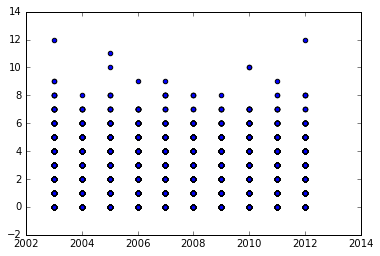

In [150]:
plt.scatter(df['Year'],df['Children'])

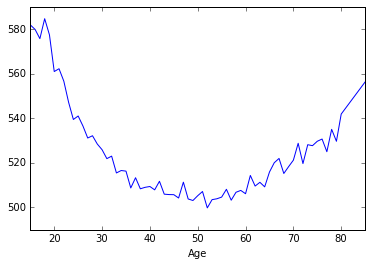

In [119]:
df.groupby('Age').Sleeping.mean().plot()

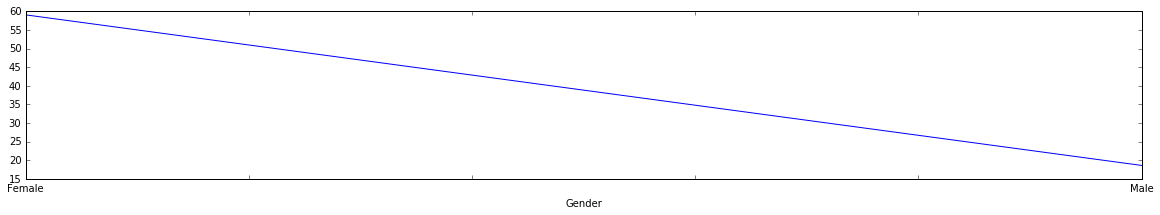

In [159]:
fig = plt.gcf()
fig.set_size_inches(20, 3)
df.groupby(['Gender'])['Housework'].mean().plot()

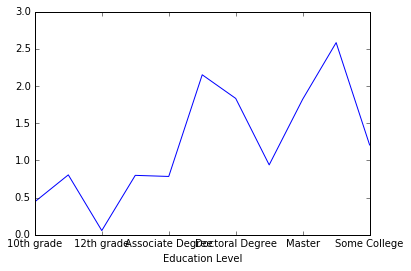

In [141]:
df.groupby(['Education Level']).Golfing.mean().plot()

In [102]:
volunt = df[(df['Weekly Earnings'] > 0 )& (df['Volunteering'] > 0 )]

In [112]:
len(df)

130150

In [168]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/9bfgt92wyeywhm3sm45xuozhe')

c:\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [172]:
df[ df.State == 'RI']

,Store_Name,Longitude,Latitude,Address,Address Line #2,City,State,Zip5,Zip4,County
518,EL BOMBAZO MARKET INC.,-71.414162,41.797760,981 Broad St,NaN,Providence,RI,2905,1704,PROVIDENCE
610,Corner Store,-71.269608,41.729267,370 Child St,NaN,Warren,RI,2885,1837,BRISTOL
2231,Yorktown Market Inc,-71.457657,41.613544,6769 Post Rd,NaN,North Kingstown,RI,2852,2126,WASHINGTON
2452,COLUMBUS MINI MART,-71.362068,41.870472,232 Columbus Ave,NaN,Pawtucket,RI,2861,3407,PROVIDENCE
2687,CHINESE AMERICAN MINI MARKET INC,-71.435219,41.778812,834 Park Ave # 836,NaN,Cranston,RI,2910,2026,PROVIDENCE
2868,7-ELEVEN 33506A,-71.411301,41.822819,141 Weybosset St,NaN,Providence,RI,2903,3803,PROVIDENCE
3012,FREEDOM SEAFOODS INC,-71.435410,41.778854,840 Park Ave,NaN,Cranston,RI,2910,2026,PROVIDENCE
3295,SAMS FOOD STORES 1052,-71.416870,41.752010,885 Post Rd,NaN,Warwick,RI,2888,3361,KENT
3317,HILL MART,-71.317032,41.513607,295 Connell Hwy,NaN,Newport,RI,2840,1057,NEWPORT
4508,SHAW'S SUPERMARKET 07625,-71.460678,41.755962,8 Chapel View Blvd,NaN,Cranston,RI,2920,3062,PROVIDENCE


In [ ]:
import vincent
state_data = pd.read_csv(state_unemployment)
vis.tabular_data(state_data, columns=['State', 'Unemployment'])
vis.geo_data(bind_data='data.id', reset=True, states=state_geo)
vis.update_map(scale=1000, projection='albersUsa')
vis + (['#c9cedb', '#0b0d11'], 'scales', 0, 'range')
vis.to_json(path)

In [164]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/6mgyyd4571w5jeaz5z7u331mt')

In [165]:
df

,SUMMER FOOD SERVICE PROGRAM 1],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"(Data as of October 07, 2016)",NaN,NaN,NaN,NaN
1,Fiscal,Number of,Peak (July),Meals,Total Federal
2,Year,Sites,Participation,Served,Expenditures 2]
3,,------------Thousands------------,NaN,--Mil.--,---Million $---
4,1969,1.2,99,2.2,0.3
5,1970,1.9,227,8.2,1.8
6,1971,3.2,569,29,8.2
7,1972,6.5,1080,73.5,21.9
8,1973,11.2,1437,65.4,26.6
9,1974,10.6,1403,63.6,33.6
